<a href="https://colab.research.google.com/github/jibintom/Deep-Learning-Codebasics/blob/main/a12.%20Gradient%20Descent%20For%20Neural%20Network/Gradient_Descent_and_Neural_Network_for_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:green" align="center">Implement Gradient Descent For Neural Network (or Logistic Regression)</h2>

<h4 style="color:blue">Predicting if a person would buy life insurnace based on his age using logistic regression</h4>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df= pd.read_csv("12_insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


**Split train and test set**

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

**Preprocessing: Scale the data so that both age and affordibility are in same scaling range**

In [62]:
X_train_scaled = X_train.copy()
X_train_scaled["age"]=X_train_scaled["age"]/100

X_test_scaled = X_test.copy()
X_test_scaled["age"]= X_test_scaled["age"]/100

**Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network**

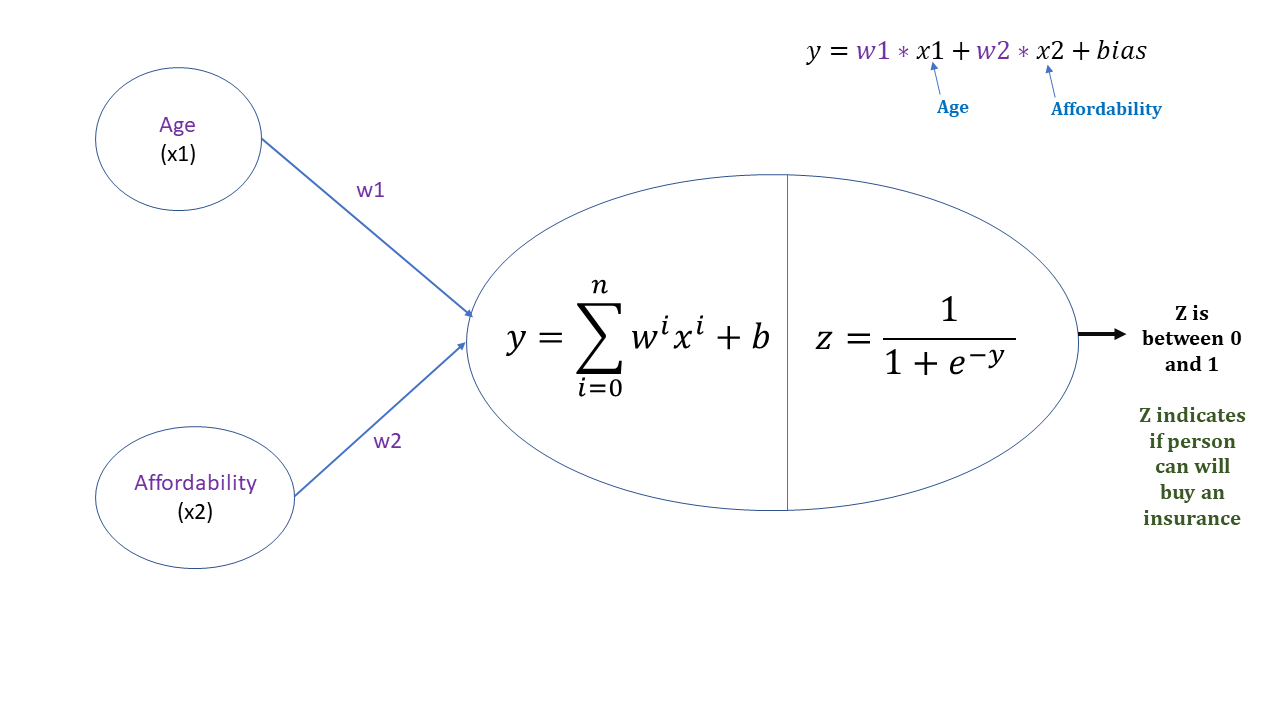

In [ ]:
from tensorflow.python import metrics
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_scaled, y_train, epochs=5000)

**Evaluate the model on test set**

In [25]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 223ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497748851776123, 1.0]

In [26]:
model.predict(X_test_scaled)

array([[0.7054848 ],
       [0.35569546],
       [0.16827846],
       [0.47801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)

In [27]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

**Now get the value of weights and bias from the model**

In [28]:
coef, intercept = model.get_weights()

In [29]:
coef, intercept

(array([[5.0608673],
        [1.4086503]], dtype=float32), array([-2.913703], dtype=float32))

**This means w1=5.060867, w2=1.4086502, bias =-2.9137027**

In [30]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [31]:
def sigmoid(x):
  import math
  return 1/(1+math.exp(-x))
sigmoid(18)

0.9999999847700205

In [32]:
def prediction_function(age, affordability):
  weighted_sum=age*coef[0] + affordability*coef[1] + intercept
  return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.705484819775958

In [33]:
prediction_function(.18, 1)

0.35569544317951163

**Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First write couple of helper routines such as sigmoid and log_loss**

In [34]:
def sigmoid_numpy(x):
  return 1/(1+np.exp(-x))

In [35]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

**All right now comes the time to implement our final gradient descent function !! yay !!!**

In [36]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [ ]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000,0.4631)

**(5.051047623653049, 1.4569794548473887, -2.9596534546250037)**

In [59]:
coef, intercept

(array([[5.0608673],
        [1.4086503]], dtype=float32), array([-2.913703], dtype=float32))

**This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function**

**Implement our own custom neural network class**

---



In [80]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [81]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917
Final weights and bias: w1: 5.051047623653049, w2: 

In [82]:
coef, intercept

(array([[5.0608673],
        [1.4086503]], dtype=float32), array([-2.913703], dtype=float32))

**This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function**

In [83]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


**(1) Predict using custom model**

In [84]:
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

**(2) Predict using tensorflow model**

In [85]:
model.predict(X_test_scaled)

array([[0.7054848 ],
       [0.35569546],
       [0.16827846],
       [0.47801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)

**Above you can compare predictions from our own custom model and tensoflow model. You will notice that predictions are almost same**